<h1> LOADING THE DATASET</h1>

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('mice.csv')
data


,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13
5,1,2,15,13
6,1,2,17,13
7,1,2,16,14
8,1,2,17,15
9,1,2,14,11


<h1> CHECKING IF THERE IS SIGNIFICANT OUTLIER </h1>

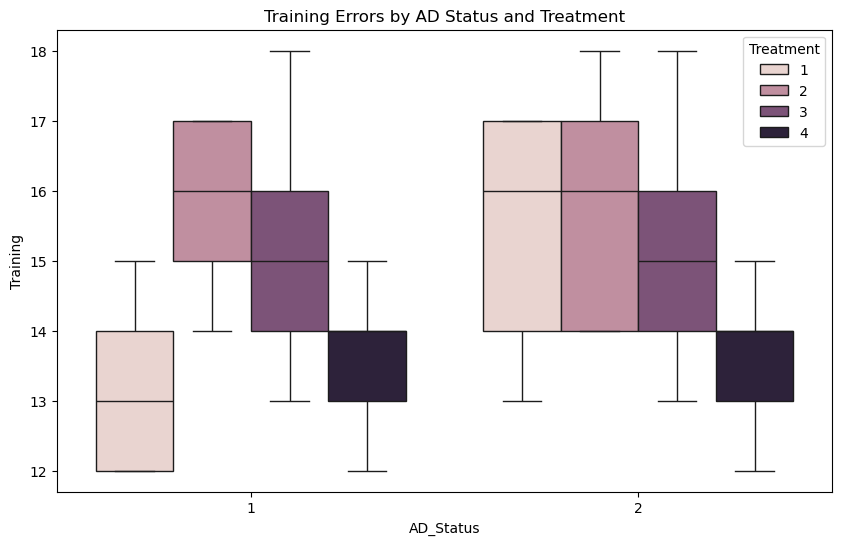

In [5]:
#checking if there is significant outliers
plt.figure(figsize=(10,6))
sns.boxplot(x="AD_Status", y="Training", hue="Treatment", data=df)
plt.title('Training Errors by AD Status and Treatment')
plt.show()


<h1> TESTING THE NORMALITY (USING SHAPIRO) </h1>

In [6]:
# Check for normality with Shapiro-Wilk Test
for status in df['AD_Status'].unique():
    for treatment in df['Treatment'].unique():
        group = df[(df['AD_Status'] == status) & (df['Treatment'] == treatment)]['Training']
        stat, p_value = stats.shapiro(group)
        print(f"Shapiro-Wilk Test for AD_Status={status}, Treatment={treatment}: p-value = {p_value}")


Shapiro-Wilk Test for AD_Status=1, Treatment=1: p-value = 0.42114965351611855
Shapiro-Wilk Test for AD_Status=1, Treatment=2: p-value = 0.42114965351612
Shapiro-Wilk Test for AD_Status=1, Treatment=3: p-value = 0.9276364233495382
Shapiro-Wilk Test for AD_Status=1, Treatment=4: p-value = 0.8139521277236892
Shapiro-Wilk Test for AD_Status=2, Treatment=1: p-value = 0.2538464637612434
Shapiro-Wilk Test for AD_Status=2, Treatment=2: p-value = 0.3772224660924305
Shapiro-Wilk Test for AD_Status=2, Treatment=3: p-value = 0.9276364233495382
Shapiro-Wilk Test for AD_Status=2, Treatment=4: p-value = 0.8139521277236892


<h1> TESTING THE NORMALITY (USING LEVENE'S) </h1>

In [7]:
# Levene's Test for Homogeneity of Variance
from scipy.stats import levene

stat, p_value = levene(df[df['AD_Status'] == 1]['Training'], df[df['AD_Status'] == 2]['Training'])
print(f"Levene's Test for AD_Status: p-value = {p_value}")


Levene's Test for AD_Status: p-value = 0.6638043901674353


<h1> TWO FACTOR ANOVA </h1>

In [8]:
# Fit the ANOVA model
model = smf.ols('Training ~ C(AD_Status) * C(Treatment)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                           sum_sq    df         F    PR(>F)
C(AD_Status)                3.025   1.0  1.216080  0.278356
C(Treatment)               28.275   3.0  3.788945  0.019678
C(AD_Status):C(Treatment)   9.075   3.0  1.216080  0.319771
Residual                   79.600  32.0       NaN       NaN


<h1> POST-HOC TEST </h1>

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test on Treatment for AD_Status=1 and AD_Status=2 separately
tukey_results = pairwise_tukeyhsd(df['Training'], df['Treatment'])
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5  0.172 -0.4223  3.4223  False
     1      3      0.9 0.5931 -1.0223  2.8223  False
     1      4     -0.7 0.7612 -2.6223  1.2223  False
     2      3     -0.6 0.8347 -2.5223  1.3223  False
     2      4     -2.2 0.0196 -4.1223 -0.2777   True
     3      4     -1.6 0.1314 -3.5223  0.3223  False
----------------------------------------------------


<h1>BONUS 15 PTS</h1>

<h1> CHECKING IF THERE IS SIGNIFICANT OUTLIERS </h1>

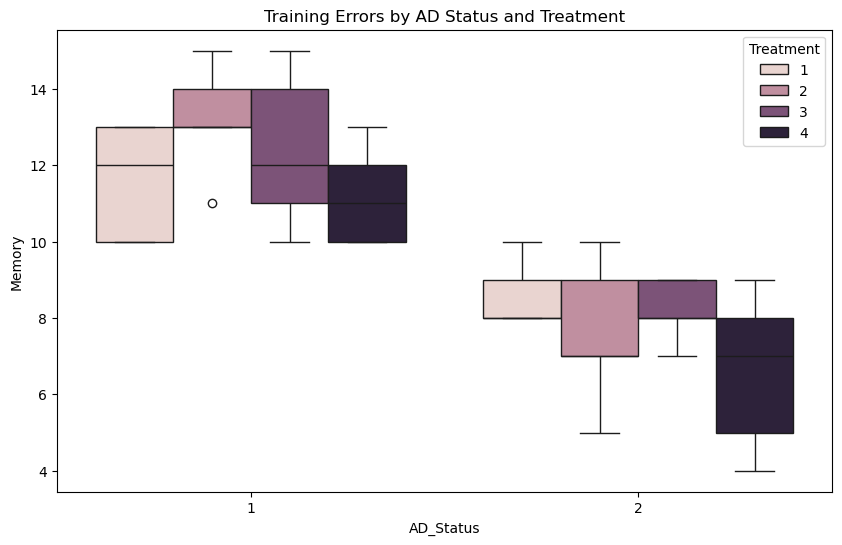

In [10]:
#checking if there is significant outliers
plt.figure(figsize=(10,6))
sns.boxplot(x="AD_Status", y="Memory", hue="Treatment", data=df)
plt.title('Training Errors by AD Status and Treatment')
plt.show()

<h1> TESTING THE NORMALITY (USING SHAPIRO) </h1>

In [14]:
# Group data by AD_Status and Treatment to check normality for each group with sufficient data
grouped_data = data.groupby(['AD_Status', 'Treatment'])

# Perform Shapiro-Wilk test for groups with at least 3 observations
normality_results = []
for (status, treatment), group in grouped_data:
    if len(group['Memory']) >= 3:  # Only test groups with 3 or more observations
        stat, p_value = stats.shapiro(group['Memory'])
        normality_results.append((status, treatment, p_value))
    else:
        normality_results.append((status, treatment, "Not enough data"))

# Display results
normality_results_df = pd.DataFrame(normality_results, columns=['AD_Status', 'Treatment', 'p-value'])
print(normality_results_df)


   AD_Status  Treatment   p-value
0          1          1  0.085693
1          1          2  0.777253
2          1          3  0.753973
3          1          4  0.421150
4          2          1  0.045954
5          2          2  0.758312
6          2          3  0.314040
7          2          4  0.753973
